In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,0.0,0.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,0.0,0.0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,0.0,0.0


<Axes: xlabel='Date'>

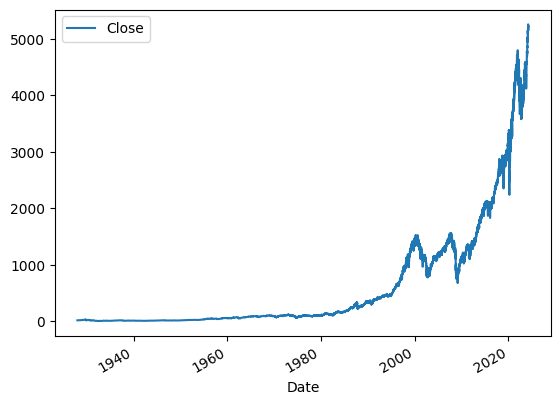

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
# data cleaning
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,5204.339844


In [9]:
# set up Target, an integer which tells you if tomorrow's price was greater than that day's
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,5204.339844,1


In [11]:
# clean up data more, remove all data that came before 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,5204.339844,1


In [13]:
from sklearn.ensemble import RandomForestClassifier

# the higher n_estimators, the better the accuraccy
# min_samples_split helps protect against overfitting. the higher we set it, the less accurate the model will be, but will have less overfitting
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# put all rows except last 100 rows in training set, last 100 rows in test set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score

# what percentage of the time when we set the stock would go up did it actually go up
preds = model.predict(test[predictors])

In [15]:
preds

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [17]:
preds

Date
2023-11-13 00:00:00-05:00    0
2023-11-14 00:00:00-05:00    0
2023-11-15 00:00:00-05:00    0
2023-11-16 00:00:00-05:00    0
2023-11-17 00:00:00-05:00    0
                            ..
2024-04-02 00:00:00-04:00    0
2024-04-03 00:00:00-04:00    0
2024-04-04 00:00:00-04:00    0
2024-04-05 00:00:00-04:00    0
2024-04-08 00:00:00-04:00    0
Length: 100, dtype: int64

In [18]:
precision_score(test["Target"], preds)

0.7

In [19]:
# combine actual values with predicted values
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

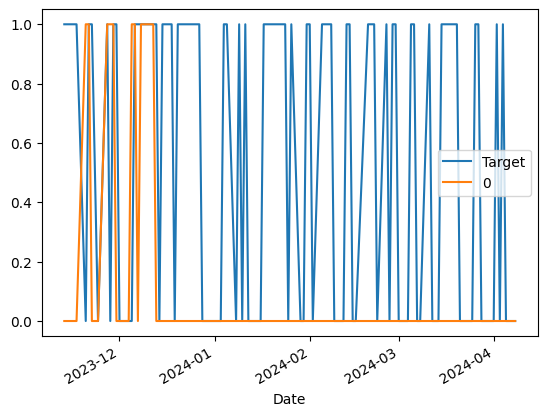

In [20]:
combined.plot()

In [21]:
# do backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [22]:
# use first 10 years to predict the 11th, 11 to predict 12, and so on. approx 250 days in trading year
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [24]:
predictions["Predictions"].value_counts()

Predictions
0    3536
1    2596
Name: count, dtype: int64

In [25]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [26]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534573
0    0.465427
Name: count, dtype: float64

In [27]:
# add some more predictors
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    # close price divided by rolling average
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    # look at the past days and take sum of days that price went up
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [28]:
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,5205.810059,0,0.998992,1.0,1.001929,2.0,1.047563,34.0,1.157343,138.0,1.280394,533.0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,5211.490234,1,0.996367,0.0,0.995146,2.0,1.038192,34.0,1.147869,137.0,1.270375,532.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,5147.209961,0,1.000545,1.0,0.995931,3.0,1.037551,34.0,1.147997,138.0,1.271002,533.0


In [30]:
# improvements
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
# predict probability instead of just boolean
# change probability threshold to 60% to make model more confident
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
predictions = backtest(sp500, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

Predictions
0.0    4299
1.0     832
Name: count, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077